In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns

from collections import defaultdict
from itertools import product
from matplotlib.ticker import FixedFormatter, FixedLocator
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['hatch.linewidth'] = 0.01

In [17]:
p_aa = lambda q, r: (q*r + q**2 *(1-r))/4
p_one = lambda n, q, r: 1 - (1-p_aa(q, r))**n

qs_exp = -np.arange(1 - 0.125, 3 + 0.125 + 1e-6, 0.025)
qs = 10**(qs_exp)
qn = len(qs)
qi = np.arange(qn)

rs_exp = -np.arange(0.5, 7.5 +1e-6, 0.05)
rs = 2.0**(rs_exp)
rn = len(rs)
ri = np.arange(rn)

print(qn, rn)

labels = defaultdict(lambda: '', {
    2**(-1): ' (siblings)',
    2**(-3): ' (first cousins)',
    2**(-5): ' (second cousins)',
    2**(-7): ' (third cousins)'
})

print(labels)

91 141
defaultdict(<function <lambda> at 0x7fa2d5bb0a60>, {0.5: ' (siblings)', 0.125: ' (first cousins)', 0.03125: ' (second cousins)', 0.0078125: ' (third cousins)'})


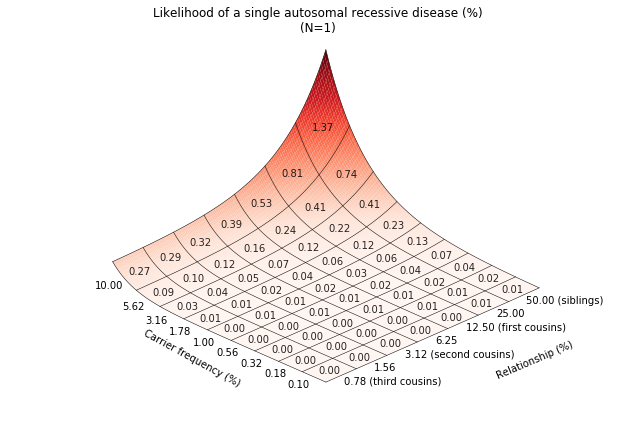

In [18]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho', elev=45, azim=-45)
ax.invert_yaxis()
ax.set_axis_off()

X, Y = np.meshgrid(qi, ri)
Z = np.vectorize(p_aa)(qs[X], rs[Y])
ax.plot_surface(X, Y, Z, cmap='Reds', ccount=qn, rcount=rn, linewidth=0, alpha=1)

for i in qi[::10]:
    ax.plot3D(X[:,i].flatten(), Y[:,i].flatten(), Z[:,i].flatten(), color='Black', linewidth=0.5, alpha=1)
for i in ri[::20]:
    ax.plot3D(X[i,:].flatten(), Y[i,:].flatten(), Z[i,:].flatten(), color='Black', linewidth=0.5, alpha=1)
for i, j in product(qi[5::10], ri[10::20]):
    color = 'White' if Z[j,i] > 0.5 else 'Black'
    zdir = (0, (Y[j+5,i] - Y[j-5,i]) + 1, (Z[j+5,i] - Z[j-5,i])*0.5)
    ax.text3D(X[j,i], Y[j,i], Z[j,i], '%.2f'%(Z[j,i]*100), ha='center', va='center', color=color, alpha=0.85)
for i in qi[5::10]:
    ax.text3D(X[-1,i], Y[-1,i] + 10, Z[-1,i], '%.2f'%(qs[i]*100), color='Black', ha='center', va='center')
for i in ri[10::20]:
    k = np.round(rs[i]*100000000)/100000000
    ax.text3D(X[i,-1] + 3, Y[i,-1]+3, Z[i,-1], '%.2f'%(rs[i]*100) + labels[k], color='Black', ha='left', va='center')
    
ax.text3D(qn*0.55, rn+25, 0, 'Carrier frequency (%)', zdir=(1, -0.2, 0), fontdict={'size': 10}, va='center', ha='center')
ax.text3D(qn+24, rn*0.48, 0, 'Relationship (%)', zdir=(-0.16, 1, 0), fontdict={'size': 10}, va='center', ha='left')
plt.rcParams['axes.titlepad'] = 30
ax.set_title('Likelihood of a single autosomal recessive disease (%)\n(N=1)')
plt.savefig('plots/single.pdf')

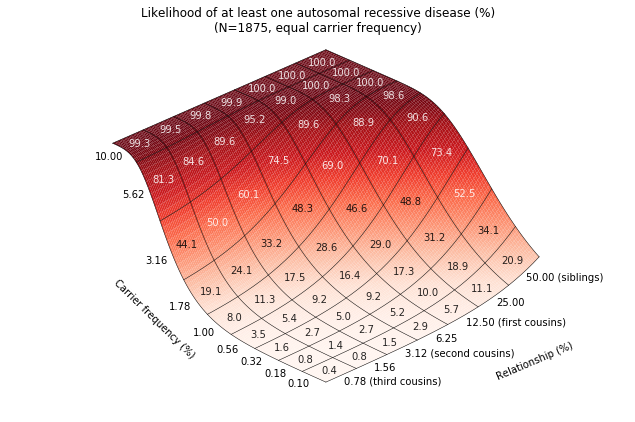

In [19]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho', elev=45, azim=-45)
ax.invert_yaxis()
ax.set_axis_off()

N = 1875
X, Y = np.meshgrid(qi, ri)
Z = np.vectorize(p_one)(N, qs[X], rs[Y])
ax.plot_surface(X, Y, Z, cmap='Reds', ccount=qn, rcount=rn, linewidth=0, alpha=1)

for i in qi[::10]:
    ax.plot3D(X[:,i].flatten(), Y[:,i].flatten(), Z[:,i].flatten(), color='Black', linewidth=0.5, alpha=1)
for i in ri[::20]:
    ax.plot3D(X[i,:].flatten(), Y[i,:].flatten(), Z[i,:].flatten(), color='Black', linewidth=0.5, alpha=1)
for i, j in product(qi[5::10], ri[10::20]):
    color = 'White' if Z[j,i] > 0.5 else 'Black'
    zdir = (0, (Y[j+5,i] - Y[j-5,i]) + 1, (Z[j+5,i] - Z[j-5,i])*0.5)
    ax.text3D(X[j,i], Y[j,i], Z[j,i], '%.1f'%(Z[j,i]*100), ha='center', va='center', color=color, alpha=0.85)
for i in qi[5::10]:
    ax.text3D(X[-1,i], Y[-1,i] + 10, Z[-1,i], '%.2f'%(qs[i]*100), color='Black', ha='center', va='center')
for i in ri[10::20]:
    k = np.round(rs[i]*100000000)/100000000
    ax.text3D(X[i,-1] + 3, Y[i,-1] + 3, Z[i,-1], '%.2f'%(rs[i]*100) + labels[k], color='Black', ha='left', va='center')
    
    
ax.text3D(qn*0.25, rn+7, 0, 'Carrier frequency (%)', zdir=(1, 0.25, 0), fontdict={'size': 10}, va='center', ha='center')
#ax.text3D(qn+11, rn*0.65, 0, 'Relationship (%)', zdir=(-0.16, 1, 0), fontdict={'size': 10}, va='center', ha='left')
ax.text3D(qn+24, rn*0.48, 0, 'Relationship (%)', zdir=(-0.16, 1, 0), fontdict={'size': 10}, va='center', ha='left')

plt.rcParams['axes.titlepad'] = 30
ax.set_title('Likelihood of at least one autosomal recessive disease (%)\n(N={:d}, equal carrier frequency)'.format(N))
plt.savefig('plots/one-equal-freqs.pdf'.format(N))

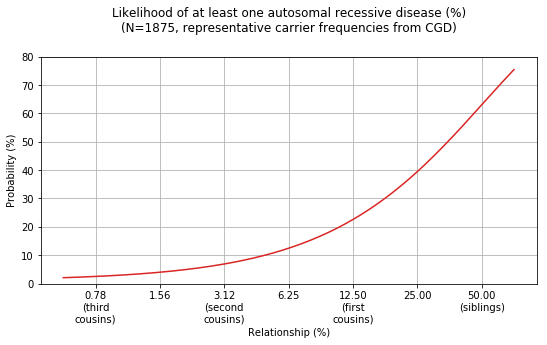

In [23]:
k = 0.3
fig, ax = plt.subplots(1,1, figsize=(11, 7))
p_aa_v = np.vectorize(p_aa)
q = np.array(
    [1/50]*10 +
    [1/100]*100 +
    [1/200]*500 +
    [1/300]*(1875-610)
)

p_one_ = np.vectorize(lambda r: 1 - np.product(1-p_aa(q, r)))

plt.rcParams['axes.titlepad'] = 20
v = p_one_(rs)
colors = matplotlib.cm.Reds(0.1+0.9*v)
#plt.bar(rs[::5]*100, v*100, np.diff(rs[::5])[1]*100, color=colors)
ax.plot(np.arange(len(v)), v*100, color=matplotlib.cm.Reds(0.7))
ax.grid()
ax.set_xlabel('Relationship (%)')
ax.set_ylabel('Probability (%)')
plt.rcParams['axes.titlepad'] = 25
ax.set_title('Likelihood of at least one autosomal recessive disease (%)\n(N=1875, representative carrier frequencies from CGD)')
ax.invert_xaxis()
ax.xaxis.set_major_locator(FixedLocator(np.arange(len(v))[10::20]))
lab = [(('%.2f'%(x*100)) + labels[np.round(x*100000000)/100000000]).replace(' ', '\n') for x in rs[10::20]]
ax.xaxis.set_major_formatter(FixedFormatter(lab))
fig.tight_layout(rect=(k/2, k/2, 1-k/2, 1-k/2))
ax.set_ylim((0, 80))
fig.savefig('plots/one-cgd-freqs-line.pdf'.format(N))


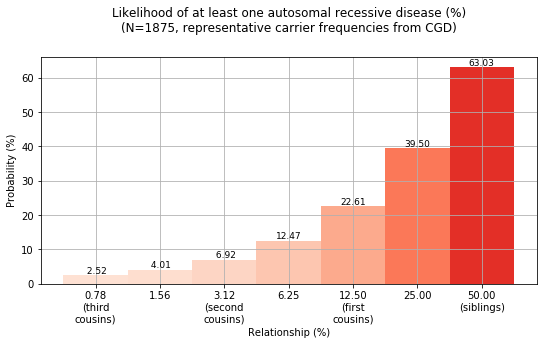

In [50]:
k = 0.3
fig, ax = plt.subplots(1,1, figsize=(11, 7))
p_aa_v = np.vectorize(p_aa)
q = np.array(
    [1/50]*10 +
    [1/100]*100 +
    [1/200]*500 +
    [1/300]*(1875-610)
)

p_one_ = np.vectorize(lambda r: 1 - np.product(1-p_aa(q, r)))

plt.rcParams['axes.titlepad'] = 20
v = p_one_(rs[10::20])
colors = matplotlib.cm.Reds(0.1+0.9*v)
plt.bar(np.arange(len(v)), v*100, 1, color=colors)
#ax.plot(np.arange(len(v)), v*100, color=matplotlib.cm.Reds(0.7))
ax.grid()
ax.set_xlabel('Relationship (%)')
ax.set_ylabel('Probability (%)')
plt.rcParams['axes.titlepad'] = 25
ax.set_title('Likelihood of at least one autosomal recessive disease (%)\n(N=1875, representative carrier frequencies from CGD)')
ax.invert_xaxis()
ax.xaxis.set_major_locator(FixedLocator(np.arange(len(v))[::]))
lab = [(('%.2f'%(x*100)) + labels[np.round(x*100000000)/100000000]).replace(' ', '\n') for x in rs[10::20]]
ax.xaxis.set_major_formatter(FixedFormatter(lab))
for x, y in zip(np.arange(len(v)), v):
    plt.text(x, y*100, ('%.2f'%(y*100)).rjust(5, ' '), ha='center', va='bottom', fontdict={'size': 9})
fig.tight_layout(rect=(k/2, k/2, 1-k/2, 1-k/2))
fig.savefig('plots/one-cgd-freqs-bar.pdf'.format(N))


In [ ]:
s.partitio